## ECG Analysis


#### Possibly useful packages
- [ECG cleaning and more](https://neuropsychology.github.io/NeuroKit/functions/ecg.html)

### Sprint 1
- Data cleaning
- Exploratory Data Analysis (Patient Metadata and Medical)
- Fourier Analysis (ECGs themselves)
    - Noise removal 
    - Detecting arrhythmia
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wfdb
%autosave 300

Autosaving every 300 seconds


We will use the `wfdb` package to read our files 

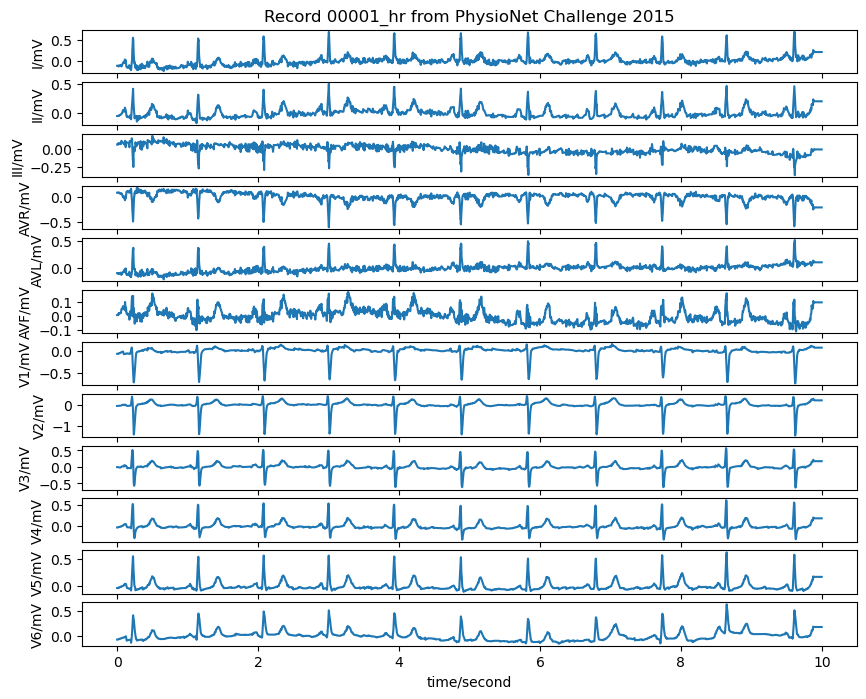

In [2]:
path = '../data/physionet.org/files/ptb-xl/1.0.3/records500/00000/'

record = wfdb.rdrecord(path+'00001_hr')
wfdb.plot_wfdb(record=record, title='Record 00001_hr from PhysioNet Challenge 2015', figsize=(10,8)) 
#display(record.__dict__)

Metadata: 
 {'fs': 500, 'sig_len': 5000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['I'], 'comments': []}


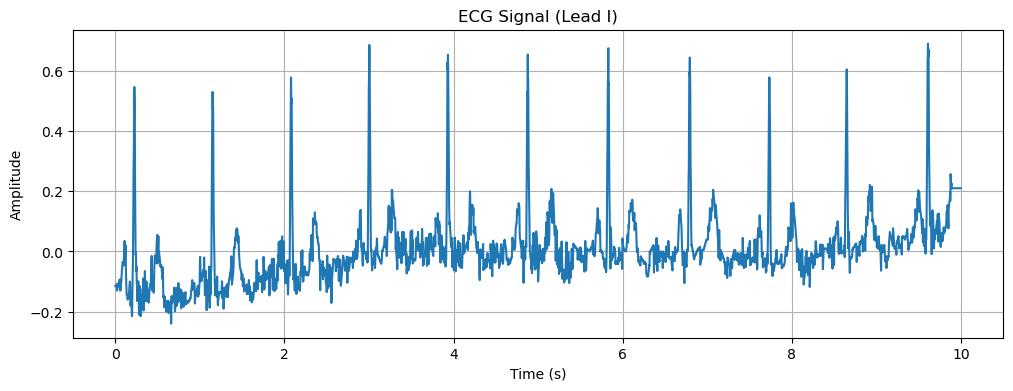

In [98]:
file = path+'00001_hr'


# Read signal and metadata
signals, fields = wfdb.rdsamp(file, channels=[0])  # Change channels=[0] based on your needs

sampling_frequency = fields['fs']  # Sampling frequency
sig_len = fields['sig_len'] # Signal length 
sig_name = fields['sig_name'] # Lead

# Print metadata
print("Metadata: \n", fields)

# Convert to time series
time = np.arange(0, sig_len) / sampling_frequency
#time = [i / sampling_frequency for i in range(sig_len)]

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, signals)
plt.title('ECG Signal (Lead {})'.format(sig_name[0]))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Fourier Analysis 

**Example 1**
- Testing out FFT on ECG above

First we get the sampling interval, $T$. We know that $T = \frac{1}{f_s}$ where $f_s$ is the sampling frequency. 

In [99]:
# First we get the sampling interval 
dt = 1/sampling_frequency

Note that the ECG signal is given in a 2D array. We need to convert it to 1D before applying FFT.
> The following method was taken from [here](https://dsp.stackexchange.com/questions/53272/fourier-transform-of-ecg-signal-in-python).

In [100]:
# Flatten the signal from 2D to 1D 
signals = signals.flatten()

Finally, we can calculate the FFT and plot it 

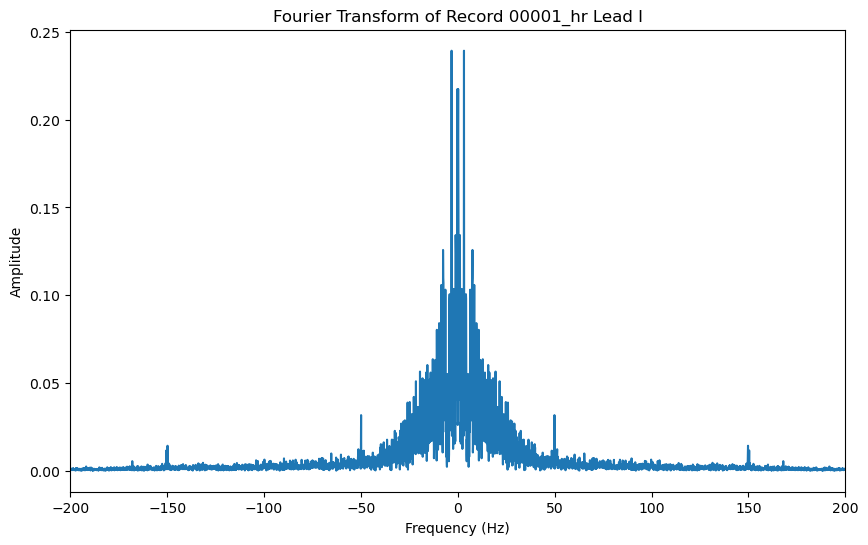

In [101]:
# FFT returns a result not centered at zero, therefore we need to fftshift it to zero
signal_fft = np.fft.fftshift(np.fft.fft(signals) * dt)
freq = np.fft.fftshift(np.fft.fftfreq(sig_len, dt))

plt.figure(figsize=(10,6))
plt.plot(freq, np.abs(signal_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Record 00001_hr Lead %s' % (sig_name[0]))
# plt.xlim(-200, 200)
plt.show()

**Example 2**
- Let's try to do the same thing for lead V4 which has less artifact in it

Metadata: 
 {'fs': 500, 'sig_len': 5000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['V4'], 'comments': []}


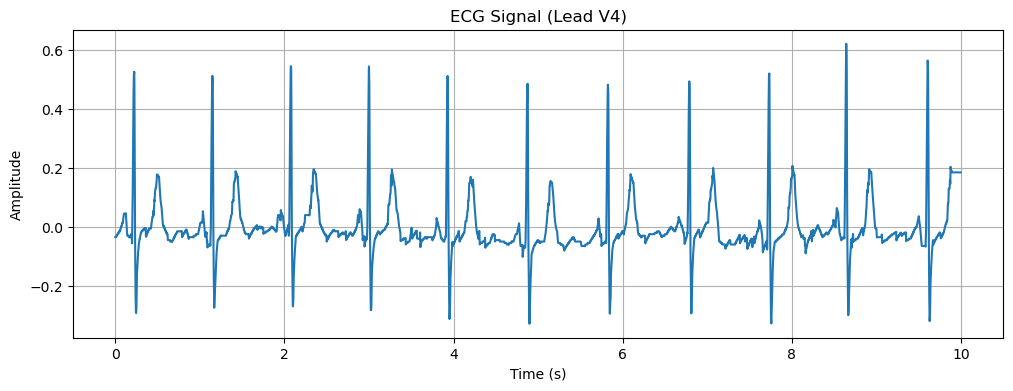

In [93]:
# Read signal and metadata
signals, fields = wfdb.rdsamp(file, channels=[9])  # Change channels=[0] based on your needs

sampling_frequency = fields['fs']  # Sampling frequency
sig_len = fields['sig_len'] # Signal length 
sig_name = fields['sig_name'] # Lead

# Print metadata
print("Metadata: \n", fields)

# Convert to time series
time = np.arange(0, sig_len) / sampling_frequency
#time = [i / sampling_frequency for i in range(sig_len)]

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, signals)
plt.title('ECG Signal (Lead {})'.format(sig_name[0]))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

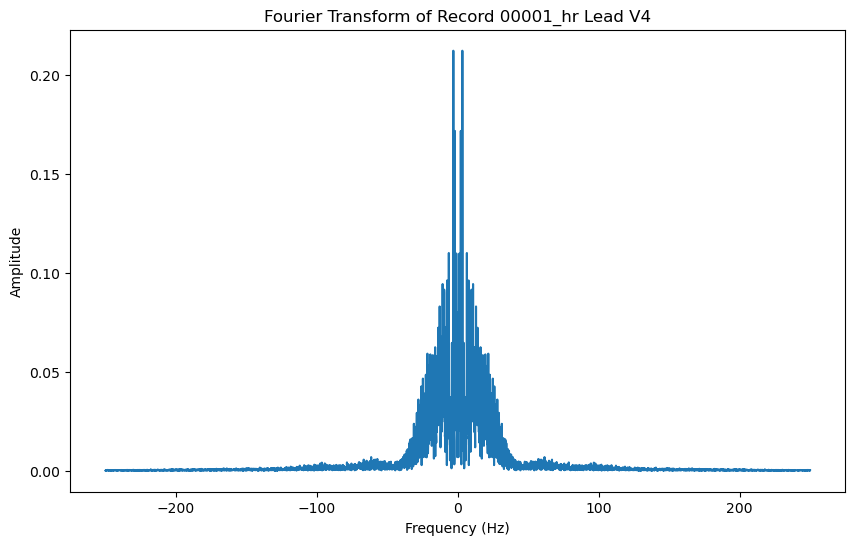

In [96]:
# First we get the sampling interval 
dt = 1/sampling_frequency

# Flatten the signal from 2D to 1D 
signals = signals.flatten()

# FFT returns a result not centered at zero, therefore we need to fftshift it to zero
signal_fft = np.fft.fftshift(np.fft.fft(signals) * dt)
freq = np.fft.fftshift(np.fft.fftfreq(sig_len, dt))

plt.figure(figsize=(10,6))
plt.plot(freq, np.abs(signal_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Record 00001_hr Lead %s' % (sig_name[0]))
# plt.xlim(-100, 100)
plt.show()

## Metadata

**Data Dictionary**
- patient_id
- age
- sex
- height
- weight 
- nurse
- site
- device
- recording_date
- report
- scp_codes
- heart_axis
- infarction_stadium1
- infarction_stadium2
- validated_by
- second_opinion
- initial_autogenerated_report
- validated_by_human
- baseline_drift
- static_noise
- burst_noise
- electrodes_problems
- extra_beats
- pacemaker
- strat_fold
- filename_lr
- filename_hr


### Patient Information

In [7]:
metadata = pd.read_csv('../data/physionet.org/files/ptb-xl/1.0.3/ptbxl_database.csv')
metadata = metadata.set_index('ecg_id')

In [9]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21799 entries, 1 to 21837
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21799 non-null  float64
 1   age                           21799 non-null  float64
 2   sex                           21799 non-null  int64  
 3   height                        6974 non-null   float64
 4   weight                        9421 non-null   float64
 5   nurse                         20326 non-null  float64
 6   site                          21782 non-null  float64
 7   device                        21799 non-null  object 
 8   recording_date                21799 non-null  object 
 9   report                        21799 non-null  object 
 10  scp_codes                     21799 non-null  object 
 11  heart_axis                    13331 non-null  object 
 12  infarction_stadium1           5612 non-null   object 
 13  infarc

In [15]:
metadata.head()

patient_id   age  sex  height  weight  nurse  site     device  \
ecg_id                                                                  
1          15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
2          13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
3          20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   
4          17014.0  24.0    0     NaN    82.0    2.0   0.0  CS-12   E   
5          17448.0  19.0    1     NaN    70.0    2.0   0.0  CS-12   E   

             recording_date                                  report  ...  \
ecg_id                                                               ...   
1       1984-11-09 09:17:34  sinusrhythmus periphere niederspannung  ...   
2       1984-11-14 12:55:37     sinusbradykardie sonst normales ekg  ...   
3       1984-11-15 12:49:10              sinusrhythmus normales ekg  ...   
4       1984-11-15 13:44:57              sinusrhythmus normales ekg  ...   
5       1984-11-17 10:43:15              sinusrhythmus normales ekg  ...   

       validated_by_human  baseline_drift static_noise burst_noise  \
ecg_id                                                               
1                    True             NaN    , I-V1,           NaN   
2                    True             NaN          NaN         NaN   
3                    True             NaN          NaN         NaN   
4                    True    , II,III,AVF          NaN         NaN   
5                    True   , III,AVR,AVF          NaN         NaN   

        electrodes_problems  extra_beats  pacemaker  strat_fold  \
ecg_id                                                            
1                       NaN          NaN        NaN           3   
2                       NaN          NaN        NaN           2   
3                       NaN          NaN        NaN           5   
4                       NaN          NaN        NaN           3   
5                       NaN          NaN        NaN           4   

                      filename_lr                filename_hr  
ecg_id                                                        
1       records100/00000/00001_lr  records500/00000/00001_hr  
2       records100/00000/00002_lr  records500/00000/00002_hr  
3       records100/00000/00003_lr  records500/00000/00003_hr  
4       records100/00000/00004_lr  records500/00000/00004_hr  
5       records100/00000/00005_lr  records500/00000/00005_hr  

[5 rows x 27 columns]

In [16]:
metadata.tail()

patient_id    age  sex  height  weight  nurse  site      device  \
ecg_id                                                                    
21833      17180.0   67.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21834      20703.0  300.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21835      19311.0   59.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21836       8873.0   64.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21837      11744.0   68.0    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_date  \
ecg_id                        
21833   2001-05-31 09:14:35   
21834   2001-06-05 11:33:39   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ...  \
ecg_id                                                     ...   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...   
21834   sinusrhythmus lagetyp normal qrs(t) abnorm    ...  ...   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...   

       validated_by_human baseline_drift static_noise burst_noise  \
ecg_id                                                              
21833                True            NaN   , alles,           NaN   
21834                True            NaN          NaN         NaN   
21835                True            NaN   , I-AVR,           NaN   
21836                True            NaN          NaN         NaN   
21837                True            NaN   , I-AVL,           NaN   

        electrodes_problems  extra_beats  pacemaker  strat_fold  \
ecg_id                                                            
21833                   NaN          1ES        NaN           7   
21834                   NaN          NaN        NaN           4   
21835                   NaN          NaN        NaN           2   
21836                   NaN         SVES        NaN           8   
21837                   NaN          NaN        NaN           9   

                      filename_lr                filename_hr  
ecg_id                                                        
21833   records100/21000/21833_lr  records500/21000/21833_hr  
21834   records100/21000/21834_lr  records500/21000/21834_hr  
21835   records100/21000/21835_lr  records500/21000/21835_hr  
21836   records100/21000/21836_lr  records500/21000/21836_hr  
21837   records100/21000/21837_lr  records500/21000/21837_hr  

[5 rows x 27 columns]

**Null values**

First we see `NaN` values in `height`. Let's take a look at it,

<Axes: ylabel='Frequency'>

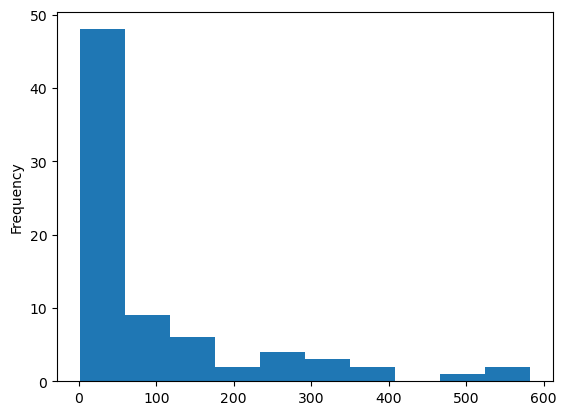

In [25]:
metadata.groupby('height')['height'].value_counts().plot(kind='hist')

### Annotations

**Data Dictionanry**

- diagnosis : 
- description : 
- diagnoastic
- form :
- rhythm :
- diagnostic class :
- dignostic subclass : 
- Statement Category : 
- SCP-ECG Statement Description : 
- AHA code :
- aECG REFID :
- CDISC Code : 
- DICOM Code :

**ECG Classes**

| # Records | Superclass | Description            | Common Name |
|-----------|------------|------------------------|-------------
| 9514      | NORM       | Normal ECG             | Normal
| 5469      | MI         | Myocardial Infarction  | Heart Attack
| 5235      | STTC       | ST/T Change            | 
| 4898      | CD         | Conduction Disturbance |
| 2649      | HYP        | Hypertrophy            |

In [12]:
reports = pd.read_csv('../data/physionet.org/files/ptb-xl/1.0.3/scp_statements.csv')

In [13]:
reports

Unnamed: 0                                        description  diagnostic  \
0         NDT                     non-diagnostic T abnormalities         1.0   
1        NST_                            non-specific ST changes         1.0   
2         DIG                                   digitalis-effect         1.0   
3       LNGQT                                   long QT-interval         1.0   
4        NORM                                         normal ECG         1.0   
..        ...                                                ...         ...   
66       BIGU  bigeminal pattern (unknown origin, SV or Ventr...         NaN   
67       AFLT                                     atrial flutter         NaN   
68      SVTAC                       supraventricular tachycardia         NaN   
69       PSVT            paroxysmal supraventricular tachycardia         NaN   
70      TRIGU  trigeminal pattern (unknown origin, SV or Vent...         NaN   

    form  rhythm diagnostic_class diagnostic_subclass  \
0    1.0     NaN             STTC                STTC   
1    1.0     NaN             STTC                NST_   
2    1.0     NaN             STTC                STTC   
3    1.0     NaN             STTC                STTC   
4    NaN     NaN             NORM                NORM   
..   ...     ...              ...                 ...   
66   NaN     1.0              NaN                 NaN   
67   NaN     1.0              NaN                 NaN   
68   NaN     1.0              NaN                 NaN   
69   NaN     1.0              NaN                 NaN   
70   NaN     1.0              NaN                 NaN   

                                   Statement Category  \
0                   other ST-T descriptive statements   
1   Basic roots for coding ST-T changes and abnorm...   
2                   other ST-T descriptive statements   
3                   other ST-T descriptive statements   
4                                     Normal/abnormal   
..                                                ...   
66  Statements related to ectopic rhythm abnormali...   
67  Statements related to impulse formation (abnor...   
68  Statements related to impulse formation (abnor...   
69  Statements related to impulse formation (abnor...   
70  Statements related to ectopic rhythm abnormali...   

                        SCP-ECG Statement Description  AHA code  \
0                      non-diagnostic T abnormalities       NaN   
1                             non-specific ST changes     145.0   
2                           suggests digitalis-effect     205.0   
3                                    long QT-interval     148.0   
4                                          normal ECG       1.0   
..                                                ...       ...   
66  bigeminal pattern (unknown origin, SV or Ventr...       NaN   
67                                     atrial flutter      51.0   
68                       supraventricular tachycardia      55.0   
69            paroxysmal supraventricular tachycardia       NaN   
70  trigeminal pattern (unknown origin, SV or Vent...       NaN   

                    aECG REFID CDISC Code DICOM Code  
0                          NaN        NaN        NaN  
1         MDC_ECG_RHY_STHILOST        NaN        NaN  
2                          NaN        NaN        NaN  
3                          NaN        NaN        NaN  
4                          NaN        NaN    F-000B7  
..                         ...        ...        ...  
66                         NaN        NaN        NaN  
67        MDC_ECG_RHY_ATR_FLUT        NaN        NaN  
68        MDC_ECG_RHY_SV_TACHY        NaN   D3-31290  
69  MDC_ECG_RHY_SV_TACHY_PAROX        NaN        NaN  
70                         NaN        NaN        NaN  

[71 rows x 13 columns]

In [12]:
reports.rename(columns={'Unnamed: 0': 'diagnosis'}, inplace=True)